<div class="alert alert-block alert-info">
<center>Métodos Numericos</center>
<center>LISTA 05</center>
<center>ALUNO: Estevão Holanda Lima Júnior</center>
</div>

In [1]:
import time
import numpy as np
import pandas as pd
from sympy import Symbol
import scipy.optimize as opt
import matplotlib.pyplot as plt

<div class="alert alert-block alert-info">
1. Implemente o método da Bisseção descrito pelo algoritmo 1.1 no texto. Para testar o algoritmo,
use os exemplos do material textual.
</div>

Algoritmo de ponto fixo

In [2]:
f_1 = lambda x: np.exp(-x)

In [3]:
def ponto_fixo(g, x_0, tol=1e-1, iter=1000):
    erro, count = 1, 0
    x = x_0
    while (erro > tol):
        y_x = g(x)
        if y_x == 0:
            return x
        else:
            erro = abs((y_x - x) / y_x)
        
        x = y_x
        count += 1
        if (count >= iter): break
    return x, count

In [4]:
ponto_fixo(f_1, 0)

(0.5796123355033789, 7)

In [5]:
opt.fixed_point(f_1, x0=0, xtol=1e-1)

array(0.56735086)

In [6]:
opt.fixed_point(f_1, x0=0, xtol=1e-1, method='iteration')

0.5796123355033789

In [7]:
opt.fixed_point(f_1, x0=0, xtol=1e-1, method='iteration', maxiter=7)

0.5796123355033789

Método Newton-Raphson

In [8]:
f_1_2 = lambda x: np.exp(-x) - x

In [9]:
d_f_1_2 = lambda x: -np.exp(-x) - 1

In [10]:
def newt_raph(f, der_f, initial, tol=1e-4, max_iterations=1000):
    error, iterations = 1, 0
    x_ant = initial
    while iterations <= max_iterations:
        
        if(f(x_ant) == 0):
            break
        
        x = x_ant - (f(x_ant) / der_f(x_ant))
        
        error = abs((x - x_ant)/x)
        
        if error <= tol:
            break
        
        x_ant = x
        iterations += 1
    return x, iterations
        

Teste 1

In [11]:
newt_raph(f_1_2, d_f_1_2, 0)

(0.5671432904097811, 3)

In [12]:
opt.root_scalar(f_1_2, fprime=d_f_1_2, x0=0, method='newton')

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 5
           root: 0.567143290409784

Teste 2

In [13]:
newt_raph(f_1_2, d_f_1_2, -10)

(0.5671432904097838, 13)

In [14]:
opt.root_scalar(f_1_2, fprime=d_f_1_2, x0=-10, method='newton')

      converged: True
           flag: 'converged'
 function_calls: 28
     iterations: 14
           root: 0.5671432904097838

Método da secante

In [15]:
def secante(f, x0, x1, tol=1e-4, max_iterations=1000):
    error, iterations = 1, 0
    x = x1
    while iterations <= max_iterations:
        y0 = f(x0)
        y1 = f(x1)
        if(y1 == 0 or y0 == 0):
            break
        x = x0 - y0 * ((x1 - x0) / (y1 - y0))
        error = abs((x - x1)/x)
        if error <= tol: break
        iterations += 1
        x0 = x1
        x1 = x
    return x, iterations

In [16]:
f_1_3 = lambda x: np.cos(x) - x

In [17]:
x1 = 0.5
x0 = 0.9

In [18]:
secante(f_1_3, x0=x0, x1=x1)

(0.7390851330933109, 3)

In [19]:
opt.root_scalar(f_1_3, method='secant', x0=x0, x1=x1)

      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 5
           root: 0.7390851332151607

<div class="alert alert-block alert-info">
    2. Use a iteração de ponto fixo simples para localizar a raiz de $f(x) = 2 sin(\sqrt{x})-x$, tendo $x_0 = 0, 5$
e adotando como critério de parada o erro $e_a ≤ 0, 001%$.
</div>

In [20]:
f_2 = lambda x: 2 * np.sin(np.sqrt(x))-x

In [21]:
ponto_fixo(f_2, 0.5, 0.001)

(0.768602780340925, 6)

In [22]:
opt.fixed_point(f_2, x0=1, xtol = 0.001)

array(0.76864886)

<div class="alert alert-block alert-info">
3. Determine a maior raiz real de $f (x) = 2x^3 − 11.7x^2 + 17.7x − 5$
    
(a) Graficamente;
    
(b) Pelo método da iteração de ponto fixo (três iterações, x0 = 3)( certifique-se de desenvolver uma solução que convirja para a raiz);
    
(c) Pelo método de Newton-Raphson (três iterações, x0 = 3);
    
(d) Pelo método da secante (três iterações, x−1 = 3, x0 = 4).
    
 </div>

### A)

In [23]:
f_3_a = lambda x: 2*x**3 - 11.7*x**2 + 17.7*x - 5

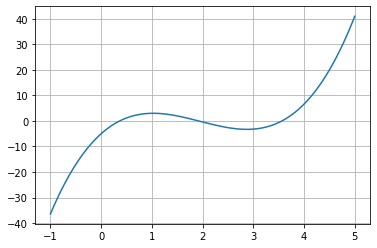

In [24]:
x = np.linspace(-1,5,200)
plt.plot(x,f_3_a(x))
plt.grid()

Ponto fixo

In [25]:
g_3_b = lambda x: 2*x**3 - 11.7*x**2 + 18.7*x - 5

In [26]:
ponto_fixo(g_3_b, 3, iter=3)

(-2742.5462420480503, 3)

In [27]:
opt.fixed_point(g_3_b, x0=3, method='iteration', maxiter=3)

RuntimeError: Failed to converge after 3 iterations, value is -2742.5462420480503

Newton-Raphson

In [ ]:
d_f_3b = lambda x : 6*x**2 - 23.4*x + 17.7

In [ ]:
newt_raph(f_3_a, d_f_3b,initial=3, max_iterations=3)

Secante

In [ ]:
secante(f_3_a, 3, 4, max_iterations=3)

<div class="alert alert-block alert-info">
    
4. Compare os métodos da bisseção, falsa posição, do ponto fixo, de Newton-Raphson e da secante,
localizando a raiz das seguintes equações:
    
(a) $ f_1 (x) = 2x^4 + 4x^3 + 3x^2 − 10x − 15 $, com x∗ ∈ [0, 3]

(b) $ f_2(x) = (x + 3)(x + 1)(x − 2)^3 $, com x* ∈ [0, 5] 
    
(c) $ f_3(x) = 5x^3 + x^2 − e^{1−2x} + cos(x) + 20 $, com x∗ ∈ [−5, 5]

(d) $ f_4(x) = sin(x)x + 4 $, com x∗ ∈ [1, 5]

(e) $ f_5(x) = (x − 3)^5ln(x) $, com x*  ∈ [2, 5]

(f) $ f_6(x) = x^10 − 1$, com x∗ ∈ [0.8, 1.2] 
    
        
Para as avaliações, deve-se considerar:

• o número máximo de iterações de todos os métodos testados não pode ultrapassar 200;
    
• a tolerância deve ser de 10−10;

• para os métodos abertos, escolha os limites do intervalo, respectivamente como x?1 e x0.
    
Para cada método, estamos interessados em comparar:

• raiz;

• número de iterações até o critério de parada;
    
• se houve erro de convergência;

• tempo de cálculo (procure como calcular tempo de execução usando jupyter notebooks, como %timeit).
    
</div>

In [39]:
def bissecao(func, a, b, tol=1e-10, inter=None, verbose=False):
    erro, x_ant, count = 1, a, 0
    y_a = func(a)
    y_b = func(b)
    x = 0
    while(erro > tol):
        if y_a * y_b > 0:
            if verbose: print("Não ha raiz nesse intervalo.")
            return None
        
        if y_a * y_b == 0:
            if verbose: print(f"Encontrou a raiz {a if y_a == 0 else b}")
            return a if y_a == 0 else b
        
        x_ant = x
        x = (a + b) / 2
        y_x = func(x)
        
        count += 1
        if verbose: print(f"Interação: {count} ==================== X:{x:.4f} | Erro:{erro:.4f} | Inferior:{a:.2f} | Superior:{b:.2f}")
        
        if(inter != None and count >= inter): break
        
        if y_a * y_x < 0:
            b = x
            y_b = y_x
            
        elif y_x * y_b < 0:
            a = x
            y_a = y_x
        
        erro = abs((x - x_ant)/x)
    
    return x, count

In [40]:
def falsa_posicao(func, a, b, tol=1e-10, inter=None, verbose=False):
    erro, x_ant, count = 1, a, 0
    y_a = func(a)
    y_b = func(b)
    x = 0
    while(erro > tol):
        if y_a * y_b > 0:
            if verbose: print("Não ha raiz nesse intervalo.")
            return None
        
        if y_a * y_b == 0:
            if verbose: print(f"Encontrou a raiz {a if y_a == 0 else b}")
            return a if y_a == 0 else b
        
        x_ant = x
        x = b - ((y_b * (a-b)) / (y_a - y_b))
        y_x = func(x)
        
        count += 1
        if verbose: print(f"Interação: {count} ==================== X:{x:.4f} | Erro:{erro:.4f} | Inferior:{a:.2f} | Superior:{b:.2f}")
        
        if(inter != None and count >= inter): break
        
        if y_a * y_x < 0:
            b = x
            y_b = y_x
            
        elif y_x * y_b < 0:
            a = x
            y_a = y_x
        
        erro = abs((x - x_ant)/x)
    
    return x, count

In [28]:
def metodos(func, der, x0, x1, func_fp = None, tol=1e-10, maxInter=200, verbose=False):
    results = pd.DataFrame()
    
    #Bisseção
    erro = 0
    
    if verbose: print("Bisseção")
    
    try:
        init = time.perf_counter()
        root_des, inter_des = bissecao(func, x0, x1, tol=tol, inter=maxInter)
        t1 = time.perf_counter() - init
        
    except Exception as e:
        print(f"Bisseção: {e}")
        erro = 1
    
    try:
        init = time.perf_counter()  
        opt_res = opt.root_scalar(func, method='bisect', bracket=[x0,x1], xtol=tol, maxiter=maxInter)
        t2 = time.perf_counter() - init
        root_opt = opt_res.root
        inter_opt = opt_res.iterations
    except Exception as e:
        print(f"Bisseção: {e}")
        erro = 2 if erro == 0 else 3
    
    if erro == 0: results["bisseção"] = [root_des, root_opt, t1, t2, inter_des, inter_opt, np.nan]
    if erro == 1: results["bisseção"] = [np.nan, root_opt, np.inf, t2, np.inf, inter_opt, "des"]
    if erro == 2: results["bisseção"] = [root_des, np.nan, t1, np.inf, inter_des, np.inf, "opt"]
    if erro == 3: results["bisseção"] = [np.nan, np.nan, np.inf, np.inf, np.inf, np.inf, "des/opt"]
    #----------------------------------------#
    
    #Falsa posição
    try:
        if verbose: print("Falsa posição")
        init = time.perf_counter()
        root_des, inter_des = falsa_posicao(func, x0, x1, tol=tol, inter=maxInter)
        t1 = time.perf_counter() - init
    
        results["falsa posição"] = [root_des, np.nan, t1, np.nan, inter_des, np.nan, np.nan]
    except Exception as e:
        print(f"Falsa posição: {e}")
        results["falsa posição"] = [np.nan, np.nan, np.inf, np.nan, np.inf, np.nan, "des/opt"]
    #----------------------------------------#
    
    #Ponto fixo
    erro = 0
    
    if verbose: print("Ponto fixo")
    
    try:
        init = time.perf_counter()
        root_des, inter_des = ponto_fixo(func_fp, x0, iter=maxInter, tol=tol)
        t1 = time.perf_counter() - init
    except Exception as e:
        print(f"Ponto Fixo: {e}")
        erro = 1
    
    try:
        init = time.perf_counter()  
        opt_res = opt.fixed_point(func_fp, x0, maxiter=maxInter, xtol=tol)
        t2 = time.perf_counter() - init
        root_opt = opt_res
        inter_opt = np.nan
    except Exception as e:
        print(opt_res)
        print(f"Ponto Fixo: {e}")
        erro = 2 if erro == 0 else 3
    
    if erro == 0: results["ponto fixo"] = [root_des, root_opt, t1, t2, inter_des, inter_opt, np.nan]
    if erro == 1: results["ponto fixo"] = [np.nan, root_opt, np.inf, t2, np.inf, inter_opt, "des"]
    if erro == 2: results["ponto fixo"] = [root_des, np.nan, t1, np.inf, inter_des, np.inf, "opt"]
    if erro == 3: results["ponto fixo"] = [np.nan, np.nan, np.inf, np.inf, np.inf, np.inf, "des/opt"]
    #----------------------------------------#
    
    #Newton-Raphson
    erro = 0
    
    if verbose: print("Newton-Raphson")
    
    try:
        init = time.perf_counter()
        root_des, inter_des = newt_raph(func, der, x0, tol=tol, max_iterations=maxInter)
        t1 = time.perf_counter() - init
    except Exception as e:
        print(f"Newton-Raphson: {e}")
        erro = 1
    
    try:
        init = time.perf_counter()  
        opt_res = opt.root_scalar(func, fprime=der, x0=x0, method='newton', xtol=tol, maxiter=maxInter)
        t2 = time.perf_counter() - init
        root_opt = opt_res.root
        inter_opt = opt_res.iterations
    except Exception as e:
        print(f"Newton-Raphson: {e}")
        erro = 2 if erro == 0 else 3
    
    if erro == 0: results["Newton-Raphson"] = [root_des, root_opt, t1, t2, inter_des, inter_opt, np.nan]
    if erro == 1: results["Newton-Raphson"] = [np.nan, root_opt, np.inf, t2, np.inf, inter_opt, "des"]
    if erro == 2: results["Newton-Raphson"] = [root_des, np.nan, t1, np.inf, inter_des, np.inf, "opt"]
    if erro == 3: results["Newton-Raphson"] = [np.nan, np.nan, np.inf, np.inf, np.inf, np.inf, "des/opt"]
    #----------------------------------------#
    
    #Secante
    erro = 0
    
    if verbose: print("Secante")
    
    try:
        init = time.perf_counter()
        root_des, inter_des = secante(func, x0, x1, tol=tol, max_iterations=maxInter)
        t1 = time.perf_counter() - init
    except Exception as e:
        print(f"Secante: {e}")
        erro = 1
    
    try:
        init = time.perf_counter()  
        opt_res = opt.root_scalar(func, method='secant', x0=x0, x1=x1, xtol=tol, maxiter=maxInter)
        t2 = time.perf_counter() - init
        root_opt = opt_res.root
        inter_opt = opt_res.iterations
    except Exception as e:
        print(f"Secante: {e}")
        erro = 2 if erro == 0 else 3
    
    if erro == 0: results["Secante"] = [root_des, root_opt, t1, t2, inter_des, inter_opt, np.nan]
    if erro == 1: results["Secante"] = [np.nan, root_opt, np.inf, t2, np.inf, inter_opt, "des"]
    if erro == 2: results["Secante"] = [root_des, np.nan, t1, np.inf, inter_des, np.inf, "opt"]
    if erro == 3: results["Secante"] = [np.nan, np.nan, np.inf, np.inf, np.inf, np.inf, "des/opt"]   
    #----------------------------------------#
    
    results = results.T
    results.columns = ["Desenvolvido", "scipy.optimize", "Time - Des", "Time - OPT", "Interações - Des", "Interações - OPT", "Erro"]
    return results

In [29]:
maxIter = 200
tol = 1e-10

### a)

In [30]:
# Função
f_a = lambda x: 2*x**4 + 4*x**3 + 3*x**2 - 10*x - 15

# Derivada
der_a = lambda x: 8*x**3 + 12*x**2 + 6*x - 10

# f(x) = x -> Ponto fixo
g_a = lambda x: (2*x**4 + 4*x**3 + 3*x**2 - 15) / 10

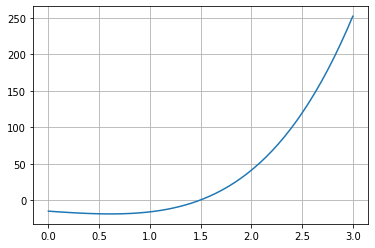

In [31]:
plt.plot(np.linspace(0,3), f_a(np.linspace(0,3)))
plt.grid(True)

In [32]:
metodos(f_a, der_a, 0, 3, g_a, tol, maxIter, True)

Bisseção
Bisseção: name 'bissecao' is not defined
Falsa posição
Falsa posição: name 'falsa_posicao' is not defined
Ponto fixo
Newton-Raphson
Secante


,Desenvolvido,scipy.optimize,Time - Des,Time - OPT,Interações - Des,Interações - OPT,Erro
bisseção,NaN,1.492879,inf,0.000171,inf,35,des
falsa posição,NaN,NaN,inf,NaN,inf,NaN,des/opt
ponto fixo,-1.300384,-1.3003841326439198,0.000103,0.002486,35,NaN,NaN
Newton-Raphson,-1.300384,-1.300384,0.000057,0.001041,5.0,6.0,NaN
Secante,-1.300384,-1.300384,0.000076,0.001614,10.0,11.0,NaN


### b)

In [33]:
# Função
f_b = lambda x: (x+3) * (x+1) * (x-2)**3

# Derivada
der_b = lambda x: (x-2)**3 * (x+1)+(x-2)**3 * (x+3)+3*(x-2)**2 * (x+1)*(x+3)

# f(x) = x -> Ponto fixo
g_b = lambda x: (x+3) * (x+1) * (x-2)**3 + x

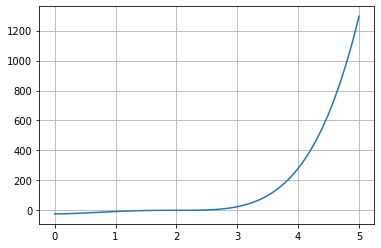

In [34]:
plt.plot(np.linspace(0,5), f_b(np.linspace(0,5)))
plt.grid(True)

In [ ]:
metodos(f_b, der_b, 0, 4, g_b, tol, maxIter, True)

Bisseção
Falsa posição
Ponto fixo


A execução ficou muito longa e não foi finalizado.

### c)

In [35]:
# Função
f_c = lambda x: 5*x**3 + x**2 - np.exp(1-2*x) + np.cos(x) + 20

# Derivada
der_c = lambda x: 15*x**2 + 2*x + 2*np.exp(1-2*x) - np.sin(x)

# f(x) = x -> Ponto fixo
g_c = lambda x: 5*x**3 + x**2 - np.exp(1-2*x) + np.cos(x) + 20 + x

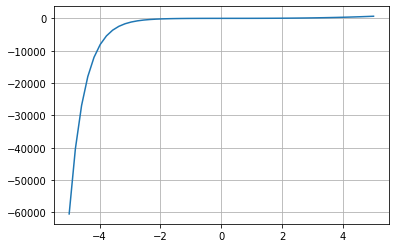

In [36]:
plt.plot(np.linspace(-5,5), f_c(np.linspace(-5,5)))
plt.grid(True)

In [41]:
metodos(f_c, der_c, -5, 5, g_c, tol, maxIter, True)

Bisseção
Bisseção: float division by zero
Falsa posição
Ponto fixo
Newton-Raphson
Secante


C:\Users\domin\AppData\Local\Temp\ipykernel_8652\699328827.py:8: RuntimeWarning: overflow encountered in exp
  g_c = lambda x: 5*x**3 + x**2 - np.exp(1-2*x) + np.cos(x) + 20 + x
C:\Users\domin\AppData\Local\Temp\ipykernel_8652\4012239433.py:9: RuntimeWarning: invalid value encountered in double_scalars
  erro = abs((y_x - x) / y_x)


,Desenvolvido,scipy.optimize,Time - Des,Time - OPT,Interações - Des,Interações - OPT,Erro
bisseção,NaN,-0.92956,inf,0.000629,inf,37,des
falsa posição,1.568769,NaN,0.005,NaN,200.0,NaN,NaN
ponto fixo,-inf,-5.0,0.001048,0.001207,2,NaN,NaN
Newton-Raphson,-0.92956,-0.92956,0.001102,0.002467,12.0,13.0,NaN
Secante,-0.92956,-0.92956,0.000978,0.0038,21.0,24.0,NaN


Overflow em bisseção.

### d)

In [42]:
# Função
f_d = lambda x: np.sin(x) * x + 4

# Derivada
der_d = lambda x: np.cos(x)*x + np.sin(x)

# f(x) = x -> Ponto fixo
g_d = lambda x: np.sin(x) * x + 4 + x

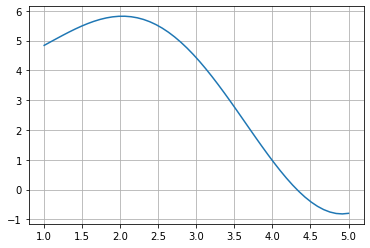

In [43]:
plt.plot(np.linspace(1,5), f_d(np.linspace(1,5)))
plt.grid(True)

In [44]:
metodos(f_d, der_d, 1, 5, g_d, tol, maxIter, True)

Bisseção
Falsa posição
Ponto fixo
Newton-Raphson
Secante


,Desenvolvido,scipy.optimize,Time - Des,Time - OPT,Interações - Des,Interações - OPT,Erro
bisseção,4.32324,4.32324,0.000442,0.000335,34.0,36.0,NaN
falsa posição,4.32324,NaN,0.000212,NaN,10.0,NaN,NaN
ponto fixo,4.106928,4.323239543713715,0.002631,0.005358,200,NaN,NaN
Newton-Raphson,-5.461308,-5.461308,0.000354,0.001464,7.0,8.0,NaN
Secante,4.32324,4.32324,0.000221,0.0012,7.0,7.0,NaN


### e)

In [49]:
# Função
f_e = lambda x: (x-3)**5 * np.log(x)

# Derivada
der_e = lambda x: 5 * np.log(x) * (x-3)**4 + ((x-3)**5 / x)

# f(x) = x -> Ponto fixo
g_e = lambda x: (x-3)**5 * np.log(x) + x

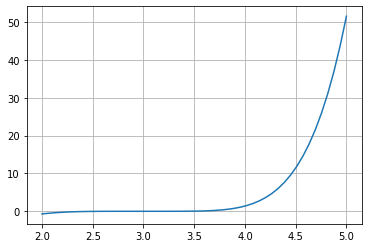

In [50]:
plt.plot(np.linspace(2,5), f_e(np.linspace(2,5)))
plt.grid(True)

In [51]:
metodos(f_e, der_e, 2, 5, g_e, tol, maxIter, True)

Bisseção
Falsa posição
Ponto fixo
      converged: True
           flag: 'converged'
 function_calls: 37
     iterations: 35
           root: 3.000000000029104
Ponto Fixo: Failed to converge after 200 iterations, value is 2.988898241299862
Newton-Raphson
Secante


C:\Users\domin\AppData\Local\Temp\ipykernel_8652\3133039039.py:8: RuntimeWarning: invalid value encountered in log
  g_e = lambda x: (x-3)**5 * np.log(x) + x


,Desenvolvido,scipy.optimize,Time - Des,Time - OPT,Interações - Des,Interações - OPT,Erro
bisseção,3.0,3.0,0.000477,0.000334,34.0,35.0,NaN
falsa posição,2.59391,NaN,0.00366,NaN,200.0,NaN,NaN
ponto fixo,NaN,NaN,0.00083,inf,3,inf,opt
Newton-Raphson,3.0,3.0,0.003233,0.019471,91.0,97.0,NaN
Secante,3.0,3.0,0.004029,0.020511,130.0,138.0,NaN


Erro em ponto fixo.

### f)

In [52]:
# Função
f_f = lambda x: x**10 - 1

# Derivada
der_f = lambda x: 10*x**9

# f(x) = x -> Ponto fixo
g_f = lambda x: x**10 - 1 + x

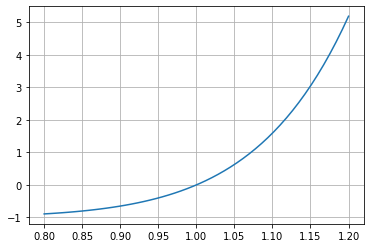

In [53]:
plt.plot(np.linspace(0.8,1.2), f_f(np.linspace(0.8,1.2)))
plt.grid(True)

In [54]:
metodos(f_f, der_f, 0.8, 1.2, g_f, tol, maxIter, True)

Bisseção
Falsa posição
Ponto fixo
Ponto Fixo: (34, 'Result too large')
Newton-Raphson
Secante


,Desenvolvido,scipy.optimize,Time - Des,Time - OPT,Interações - Des,Interações - OPT,Erro
bisseção,1.0,1.0,0.000023,0.000082,2.0,1.0,NaN
falsa posição,1.0,NaN,0.000229,NaN,45.0,NaN,NaN
ponto fixo,NaN,8.220599931767394,inf,0.001247,inf,NaN,des
Newton-Raphson,1.0,1.0,0.000044,0.001467,9.0,10.0,NaN
Secante,1.0,1.0,0.000042,0.001574,10.0,11.0,NaN


Ponto fixo resultado muito grande.